<a href="https://colab.research.google.com/github/KarthigeyanN/KarthigeyanN/blob/main/ExtractStructFromPdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install pdf2image

In [15]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.8).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [18]:
from pdf2image import convert_from_path, convert_from_bytes
!wget "https://patentimages.storage.googleapis.com/12/35/bf/b39173dda7a1d2/US7439246.pdf"
images=convert_from_path('US7439246.pdf')
len(images)

134

In [20]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
# Define our imshow function
def imshow(image, title = "Image", size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

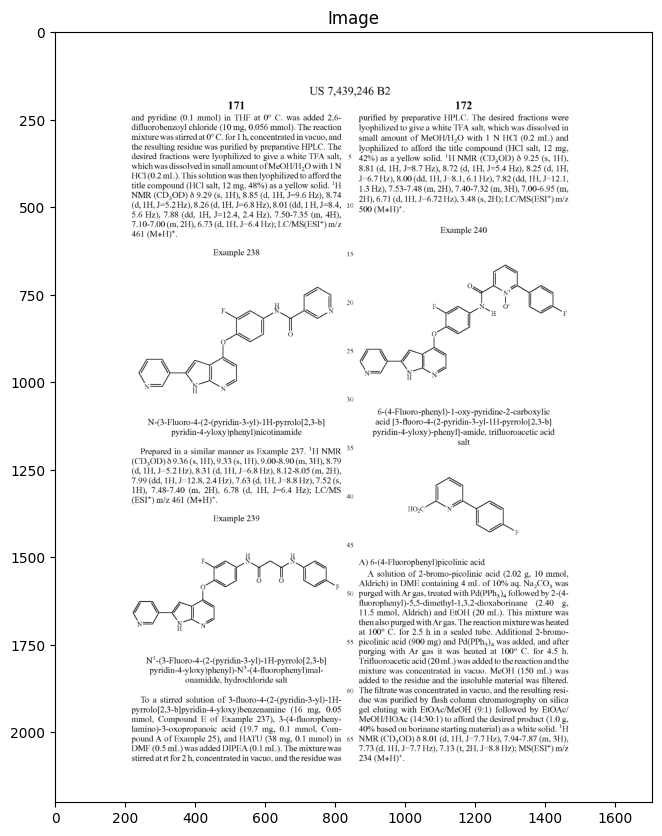

In [31]:
pNum=89
origimage=image=np.array(images[pNum])
imshow(origimage)

In [32]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #converting image to grayscale
ret,bw_image = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)
Gaussian = cv2.GaussianBlur(cv2.bitwise_not(gray_image), (19,19), 0)

In [33]:
# Finding Contours
from imutils import contours
cnts, hierarchy = cv2.findContours(Gaussian, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
(cnts, _) = contours.sort_contours(cnts, method="left-to-right")
sorted_contours = sorted(cnts, key=cv2.contourArea, reverse=True)

In [34]:
def get_contour_areas(contours):
    """returns the areas of all contours as list"""
    all_areas = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas

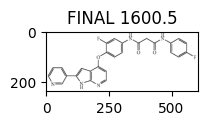

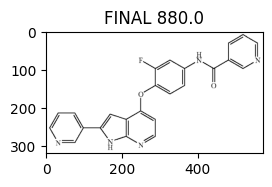

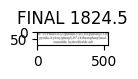

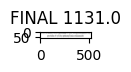

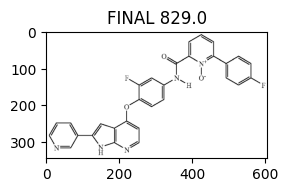

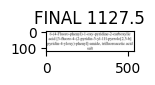

In [35]:
# Create a mask for the selected contour
mask = np.zeros_like(gray_image)
for e, cnt in enumerate(cnts):
    area = cv2.contourArea(cnt)
    if (area > 20000 and area < 50000):
        cv2.drawContours(mask, [cnt], -1, 255, thickness=cv2.FILLED)
        extracted=cv2.bitwise_not(cv2.bitwise_and(cv2.bitwise_not(gray_image), mask))
        #imshow(extracted, 'Extracted')
        # Crop the bounding rectangle of the contour (optional)
        x, y, w, h = cv2.boundingRect(cnt)
        cropped_roi = extracted[y:y+h, x:x+w]
        imshow( cropped_roi, 'FINAL ' + str(y+0.5*h), 5)
        cv2.imwrite('struct_%03d_%.0f.png' % (pNum, y+0.5*h), cropped_roi)